In [86]:
from matplotlib import pyplot as plt
import numpy as np

Suppose I have the equation $$f'(x) = x^2$$ where $x, f\in \mathbb{R}$. I want to solve this.

I can easily integrate directly to observe that $f(x) = \frac{x^3}{2} + C$.

From Taylor's theorem, we know that for some function $f$ defined at $a$ and $h$
$$f'(a) = \lim_{h\to 0} \frac{f(a+h)-f(a)}{h}.$$

So, if we choose a sufficiently small step $h$, then $$f'(a) = \frac{f(a+h)-f(a)}{h}.$$

Substitute this into $$f'(x) = x^2$$
to find
$$f(x+h) = hx^2 +f(x).$$

I need to provide an initial condition, say at $f(0) = 0$.

I want to solve on the interval $x \in [0, 2]$, and I set $h = 0.01$.

In [87]:
tMax = 2 # max time
h = 0.01 # step size
N = int(2/h + 1) # number of discrete points at which we solve. Make it an integer

f = [None]*N # empty list to fill with points
x = [None]*N
x[0] = 0 # initial point

f[0] = 0 # initial condition

an = [None]*N # vector in which to store the analytical solution
an[0] = 0

diff = [None]*N
diff[0] = an[0]-f[0]

for i in range(1, N):
    x[i] = x[i-1]+h # find the points x
    f[i] = h*x[i]**2 + f[i-1] # find the value of f at the current value of x
    an[i] = (x[i]**3)/3 # find the value of the analytical solution at x
    diff[i] = np.abs(an[i] - f[i])

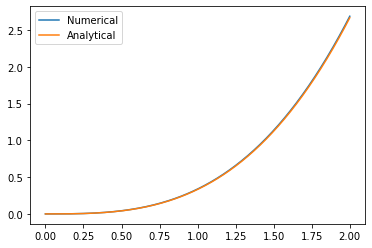

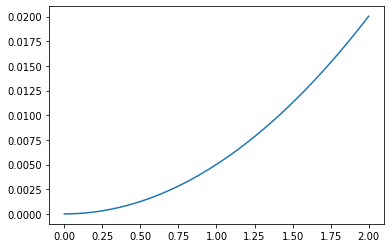

In [88]:
plt.plot(x, f, label = "Numerical")
plt.plot(x, an, label = "Analytical")
plt.legend()
plt.show()

plt.plot(x, diff)
plt.show()

The first figure is the analytical and numerical solutions plotted on the same set of axes. The second is the absolute error between the values for $f$ at any $x$.

# ODEs
The above example is for a differential equation.

Solving ODEs is only slightly harder.

Consider $u'(x) = 3u(x) + 2$.

Applying Taylor's theorem, we have
$$u(x+h) = 3hu(x)+2h + u(x).$$

Choose an initial condition, $u(0) = 0$, say, and solve as above.

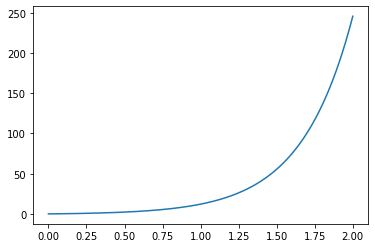

In [97]:
tMax = 2 # max time
h = 0.01 # step size
N = int(2/h + 1) # number of discrete points at which we solve. Make it an integer

u = [None]*N # empty list to fill with points
x = [None]*N
x[0] = 0 # initial point

u[0] = 0 # initial condition

for i in range(1, N):
    x[i] = x[i-1]+h # find the points x
    u[i] =  (3*h+1)*u[i-1] + 2*h # find the value of f at the current value of x
    
plt.plot(x, u)
plt.show()

# Coupled ODEs
I'd like to be able to solve coupled ODEs, such as this dimensionless system:
$$n' = n(1 − n − m) − d n,$$
$$m' = bm(1 − n − m) − (d + \delta)m.$$

In this, $n$ and $m$ are proportions of normal and mutant cells. The parameters $d, b, \delta$ are constants. The prime (') indicated a derivative with respect to time.

Now, go through the motions:
$$ n'(t) = \frac{n(t+h) - n(t)}{h}, ~ m'(t) = \frac{m(t+h) - m(t)}{h}$$
for given step size $h$.

$$n(t+h) = hn(1 - n − m) − h d n + n$$
$$m(t+h) = hbm(1 − n − m) − h(d + \delta)m + m.$$

The question tells us that $b = 4.2,~d = 0.5,~\delta = 0.1$. Additionally, we are given initial conditions $n(0) = m(0) = 0.5$. Time $t = [0, 50]$ and $h = 0.01$.

Solve as we do above.

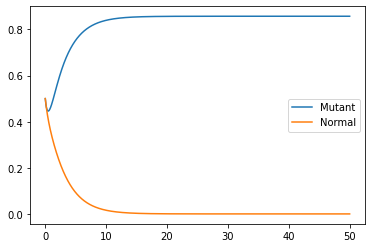

In [112]:
tMax = 50 # max time
h = 0.01 # step size
N = int(tMax/h + 1) # number of discrete points at which we solve. Make it an integer

m = [None]*N # empty list to fill with points
n = [None]*N # empty list to fill with points
x = [None]*N

x[0] = 0 # initial point
m[0] = 0.5 # initial condition
n[0] = 0.5 # initial condition

d = 0.5
b = 4.2
dt = 0.1

for i in range(1, N):
    x[i] = x[i-1]+h
    n[i] = h*(n[i-1]*(1 - n[i-1] - m[i-1]) - d*n[i-1]) + n[i-1]
    m[i] = h*b*m[i-1]*(1 - n[i-1] - m[i-1]) - h*(d + dt)*m[i-1] + m[i-1]
    
plt.plot(x, m, label = "Mutant")
plt.plot(x, n, label = "Normal")
plt.legend()
plt.show()

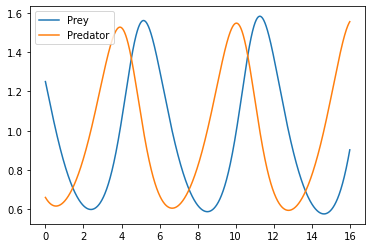

In [117]:
tMax = 16 # max time
h = 0.01 # step size
N = int(tMax/h + 1) # number of discrete points at which we solve. Make it an integer

m = [None]*N # empty list to fill with points
n = [None]*N # empty list to fill with points
x = [None]*N 

x[0] = 0 # initial point
m[0] = 1.25 # initial condition
n[0] = 0.66 # initial condition

a = 1.095

for i in range(1, N):
    x[i] = x[i-1]+h
    n[i] = h*(n[i-1] - n[i-1]*m[i-1]) + n[i-1]
    m[i] = h*(a*n[i-1]*m[i-1]-a*m[i-1]) + m[i-1]
    
plt.plot(x, m, label = "Prey")
plt.plot(x, n, label = "Predator")
plt.legend()
plt.show()

In [173]:
N = 10 # number of spatial points
M = 10 # number of time points
t = [None]*(M+1)
t[0] = 0
h = 0.01
a = np.array([None]*M)
for i in range(M):
    pass
#    a[i][0] = 1.0
#    t[i+1] = t[i]+h

#for i in range(M):
#    for j in range(N):
#        a[i][j] = 0

print(a)

[None None None None None None None None None None]
